In [1]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib
import re
import os
import sys
import time
import itertools
import seaborn
import matplotlib.pyplot as plt


import matplotlib.cm as cm
from matplotlib.colors import Normalize



from scipy.spatial.distance import pdist
clrs = seaborn.color_palette("RdBu_r",n_colors=9)
seaborn.set(style='ticks',font_scale=2)

sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")
import mouse_poker.optimize_task as mpko

In [2]:
poke_pos = mpko.layout.poke_pos

In [4]:
f = open("/Users/yves/Documents/Code/structural_knowledge/graph_transitions/regular_graphs_9_nodes_degree_2",'r')

In [5]:
txt = f.readlines()

In [6]:
def read_gunnar_graph(g_def):
    """convert output of gunnar algorithm to list of list of edges
        as well as a matrix defining the transitions as a function
        of actions
    """


    nNodes,nEdges = g_def.split(' ')[:2]
    #print(nNodes,nEdges)
    nNodes = n_states = int(nNodes)
    nEdges = int(nEdges)
    nActions = int(float(nEdges)/float(nNodes))
    print(nActions)
    #print(nActions,nNodes)

    links = [int(i) for i in re.findall('[0-9]{1,2}',g_def[6:])]

    edges = []
    edge_set = np.zeros([nNodes,nActions],dtype='int')
    cntArr = np.zeros(nNodes,dtype='int')
    for fst,snd in zip(links[:-1][::2],links[1:][::2]):
        edges.append([fst,snd])
        edge_set[fst,cntArr[fst]] = snd
        cntArr[fst] += 1
    return edges,edge_set

In [7]:
#g_spec = txt[0]

In [311]:
n_ = 3.
n_nodes = 9

loop_layout = dict([(i,np.array([np.cos(2*np.pi*i/float(n_nodes)),np.sin(2*np.pi*i/float(n_nodes))])) for i in range(n_nodes)])
line_layout = dict([(i,np.array([i,0])) for i in range(n_nodes)])

c= (np.cos(n_ * 2*np.pi*np.linspace(0,1,num=n_nodes))+1.)/2.
cm = plt.cm.RdBu_r(c)
edges = [[i,(i+1) %n_nodes] for i in range(n_nodes-1)]
G = nx.Graph()
G.add_edges_from(edges)


In [319]:
edges

[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8]]

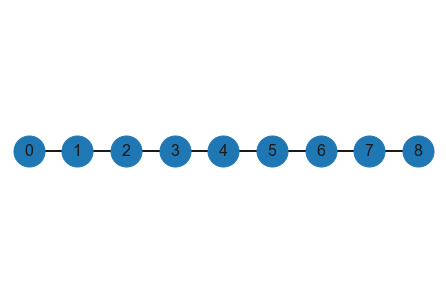

In [312]:
nx.draw(G,pos=line_layout,node_size=962,width=2)
nx.draw_networkx_labels(G,pos=line_layout,font_size=16)
print()

In [325]:
lapl = nx.linalg.adjacency_matrix(G).toarray()
lapl = lapl/np.sum(lapl,axis=0)

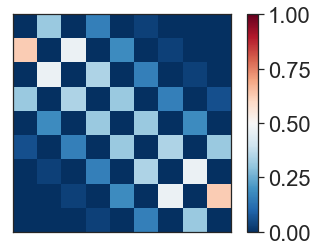

In [326]:
plt.imshow(np.linalg.matrix_power(lapl,5),cmap='RdBu_r',vmax=1.,vmin=-0)
plt.xticks([])
plt.yticks([])
plt.colorbar()

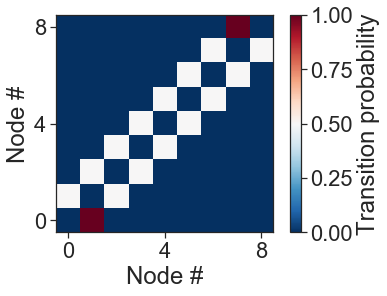

In [328]:
plt.imshow(lapl.T,cmap='RdBu_r',vmax=1.,vmin=-0)
plt.xticks([0,4,8],[0,4,8])
plt.yticks([0,4,8],[0,4,8])
plt.xlim(-.5,8.5)
plt.ylim(-.5,8.5)

plt.xlabel("Node #")
plt.ylabel("Node #")

cbar = plt.colorbar()
cbar.set_label("Transition probability")

In [ ]:
cbar.set

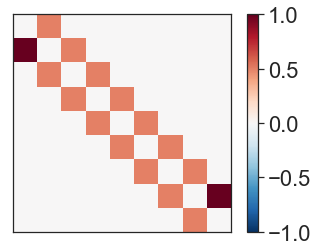

In [330]:
plt.imshow(lapl,cmap='RdBu_r',vmax=1.,vmin=-1)
plt.xticks([])
plt.yticks([])
plt.colorbar()

In [225]:
len(line_layout)

32

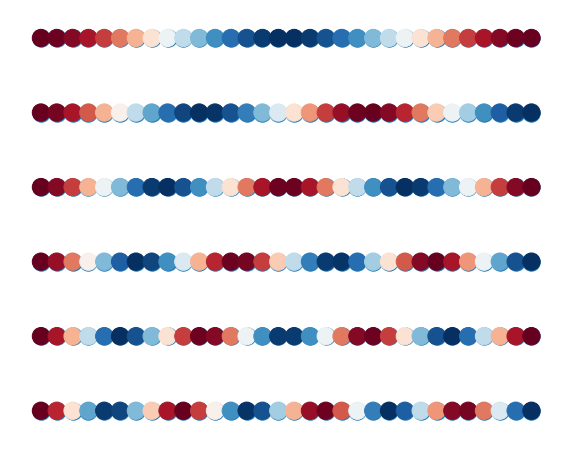

In [230]:
plt.figure(figsize=(10,8))

for ctr in range(6):
    
    plt.subplot(6,1,ctr+1)
    n_ = ctr/2. + 1
    n_nodes = 32
    c= (np.cos(n_ * 2*np.pi*np.linspace(0,1,num=n_nodes))+1.)/2.
    cm = plt.cm.RdBu_r(c)
    edges = [[i,(i+1) %n_nodes] for i in range(n_nodes)]
    G = nx.Graph()
    G.add_edges_from(edges)

    
    nx.draw(G,pos=line_layout)
    nx.draw_networkx_nodes(G,pos=line_layout,node_color=np.array(cm))

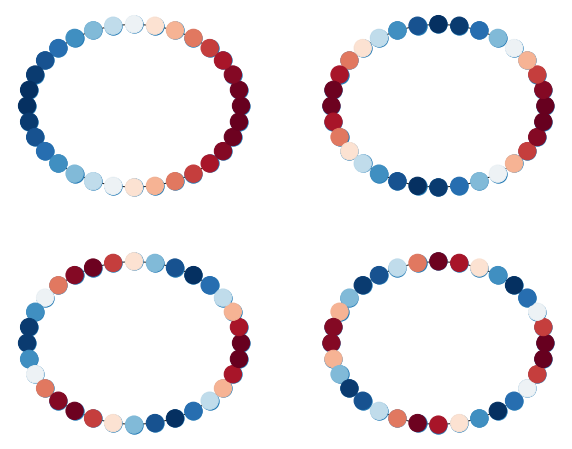

In [234]:
plt.figure(figsize=(10,8))

for ctr in range(4):
    
    plt.subplot(2,2,ctr+1)
    n_ = ctr + 1
    n_nodes = 32
    c= (np.cos(n_ * 2*np.pi*np.linspace(0,1,num=n_nodes))+1.)/2.
    cm = plt.cm.RdBu_r(c)
    edges = [[i,(i+1) %n_nodes] for i in range(n_nodes)]
    G = nx.Graph()
    G.add_edges_from(edges)

    
    nx.draw(G,pos=loop_layout)
    nx.draw_networkx_nodes(G,pos=loop_layout,node_color=np.array(cm))

In [44]:
edges,edge_set = read_gunnar_graph(txt[487])
G = nx.Graph()
G.add_edges_from(edges)

is_,layout = nx.planarity.check_planarity(G)
print('planar: {}'.format(is_))

2
planar: True


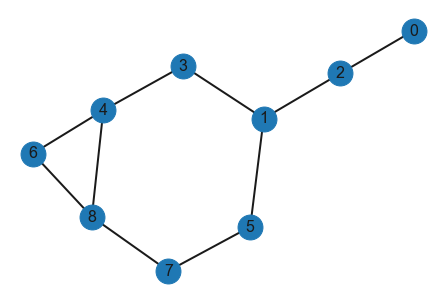

In [69]:
pos = nx.layout.kamada_kawai_layout(G)
#nx.draw_networkx_nodes(G,pos=pos,nodelist=range(9))
nx.draw(G,pos=pos,node_size=620,width=2)
nx.draw_networkx_labels(G,pos,dict([(i,i) for i in range(9)]),font_size=16)

print()

In [56]:
l = nx.linalg.laplacian_matrix(G,nodelist=dict([(i,i) for i in range(9)]))

Text(0, 0.5, 'Node number')

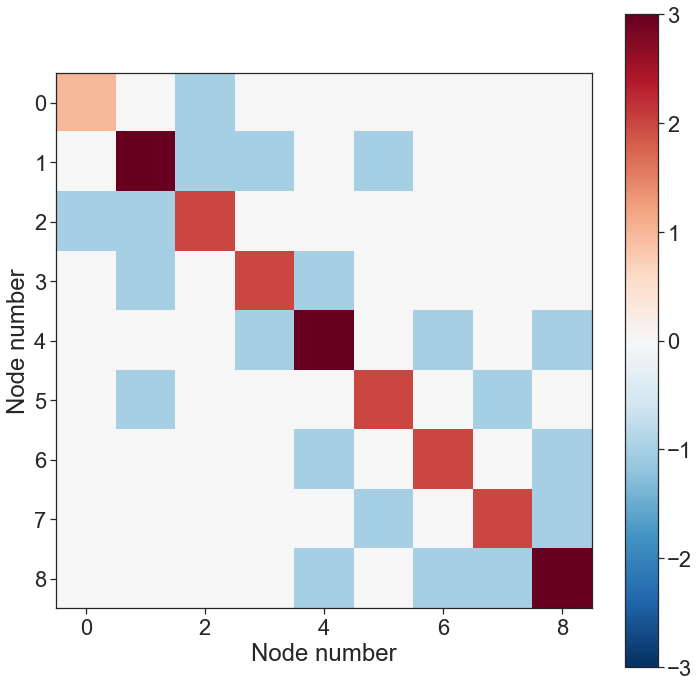

In [73]:
plt.figure(figsize=(12,12))
plt.imshow(l.toarray(),cmap='RdBu_r',vmin=-3,vmax=3)
plt.colorbar()
plt.xlabel("Node number")
plt.ylabel('Node number')

In [ ]:
%%timeit
is_,layout = nx.planarity.check_planarity(G)

In [ ]:
is_,layout = nx.planarity.check_planarity(G)
print('planar: {}'.format(is_))

In [ ]:
pos = nx.planar_layout(G)

In [ ]:
nx.draw(G,pos=pos)

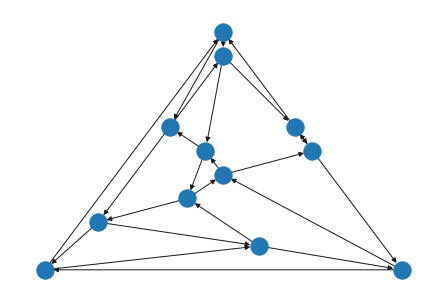

In [164]:
if is_:
    nx.draw_planar(G,)

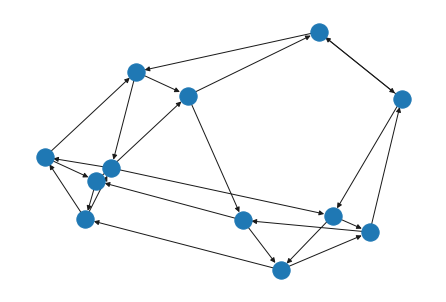

In [165]:
nx.draw_spectral(G)

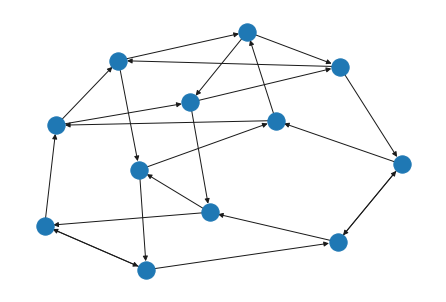

In [146]:
nx.draw_kamada_kawai(G)

In [316]:
#input: a graph in the form of a dictionary and an outter_face in the form of a list of vertices.
def tutte_embedding(graph, outter_face):
    pos = {} #a dictionary of node positions
    tmp = nx.Graph()
    for edge in outter_face:
        a,b = edge
        tmp.add_edge(a,b)
    tmp_pos = nx.spectral_layout(tmp) #ensures that outterface is a convex shape
    pos.update(tmp_pos)
    outter_vertices = tmp.nodes()
    remaining_vertices = [x for x in graph.nodes() if x not in outter_vertices]

    size = len(remaining_vertices)
    A = [[0 for i in range(size)] for i in range(size)] #create the the system of equations that will determine the x and y positions of remaining vertices
    b = [0 for i in range(size)] #the elements of theses matrices are indexed by the remaining_vertices list
    C = [[0 for i in range(size)] for i in range(size)]
    d = [0 for i in range(size)]
    for u in remaining_vertices:
        i = remaining_vertices.index(u)
        neighbors = graph.neighbors(u)
        n = 3#len(neighbors)
        A[i][i] = 1.
        C[i][i] = 1.
        for v in neighbors:
            if v in outter_vertices:
                b[i] += float(pos[v][0])/n
                d[i] += float(pos[v][1])/n
            else:
                j = remaining_vertices.index(v)
                A[i][j] = -(1/float(n))
                C[i][j] = -(1/float(n))

    x = np.linalg.solve(A, b)
    y = np.linalg.solve(C, d)
    for u in remaining_vertices:
        i = remaining_vertices.index(u)
        pos[u] = [x[i],y[i]]

    return pos


In [317]:
vv = G.edges

In [318]:
len(G.node)

12

In [319]:
list([i for i in G.neighbors(1)])

[2, 0]

In [320]:
G.neighbors(1)

In [328]:
borders = [edges[0]]
while True:
    for e in edges:
        if len(borders)==5:
            break
        if e[0]==borders[-1][1] and e not in borders and e[::-1] not in borders:
            borders.append(e)
    if len(borders)==5:
        break

        

In [329]:
borders

[[0, 2], [2, 8], [8, 7], [7, 3], [3, 4]]

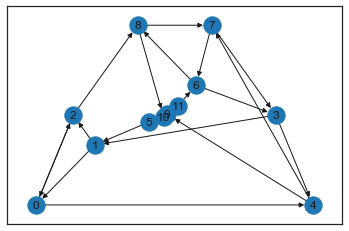

In [330]:
pos = tutte_embedding(G, borders)
nx.draw_networkx(G, pos)


In [181]:
edges[:len(G.node)]

[[0, 2],
 [0, 4],
 [1, 2],
 [1, 0],
 [2, 0],
 [2, 8],
 [3, 4],
 [3, 1],
 [4, 7],
 [4, 9]]

TypeError: cannot unpack non-iterable int object